# Online shoppers purchasing intension

Can we predict whether an online shopper will make a purchase based on their browsing behavior and session characteristics?

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [30]:
# Load dataset
df = pd.read_csv("C:\\Users\\user\\Downloads\\online shoppers purchasing intention dataset.zip")

In [31]:
# Display the first few rows
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [32]:
# Display dataset shape
print("\nDataset Shape:")
df.shape


Dataset Shape:


(12330, 18)

In [33]:
# Display dataset information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Traffic

In [34]:
print("Columns of the dataset:")
print(df.columns)

Columns of the dataset:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [35]:
# Check data types
print("Data Types:\n", df.dtypes)


Data Types:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [36]:
# Select categorical columns dynamically
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Display unique values for categorical columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Month':
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

Unique values in 'VisitorType':
['Returning_Visitor' 'New_Visitor' 'Other']


In [37]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### There is no missing value.No imputation required.

In [39]:
# Check for duplicate rows
print("Number of Duplicate Rows: ")
df.duplicated().sum()


Number of Duplicate Rows: 


125

In [40]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

In [41]:
# Verify the dataset after removing duplicates
print("Dataset shape after removing duplicates:")
df_cleaned

Dataset shape after removing duplicates:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [42]:
df_cleaned.shape

(12205, 18)

In [43]:
df2=df_cleaned.copy()

In [44]:
# Display statistical summary
print("\nStatistical Summary:")
df2.describe()


Statistical Summary:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [45]:
# Display statistical summary of Categorical columns
print("\nStatistical Summary:")
df2.describe(include='object')


Statistical Summary:


,Month,VisitorType
count,12205,12205
unique,10,3
top,May,Returning_Visitor
freq,3329,10431


In [46]:
# Calculate skewness for numerical columns
# Select only numeric columns
numerical_cols = df2.select_dtypes(include=['int64','float64'])

# Calculate skewness for numerical columns
skewness = numerical_cols.skew()

# Display the skewness values
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Administrative             1.947123
Administrative_Duration    5.592152
Informational              4.014173
Informational_Duration     7.540291
ProductRelated             4.333419
ProductRelated_Duration    7.253161
BounceRates                3.162425
ExitRates                  2.234645
PageValues                 6.350983
SpecialDay                 3.285902
OperatingSystems           2.032613
Browser                    3.217404
Region                     0.978480
TrafficType                1.958514
dtype: float64


In [47]:
# Sort skewness values in descending order
skew_asc = skewness.sort_values(ascending=False)

# Display sorted skewness values
print("Skewness of numerical columns (sorted):")
print(skew_asc)

Skewness of numerical columns (sorted):
Informational_Duration     7.540291
ProductRelated_Duration    7.253161
PageValues                 6.350983
Administrative_Duration    5.592152
ProductRelated             4.333419
Informational              4.014173
SpecialDay                 3.285902
Browser                    3.217404
BounceRates                3.162425
ExitRates                  2.234645
OperatingSystems           2.032613
TrafficType                1.958514
Administrative             1.947123
Region                     0.978480
dtype: float64


### dataset's skewness values indicate that most numerical features are positively skewed (right-skewed)

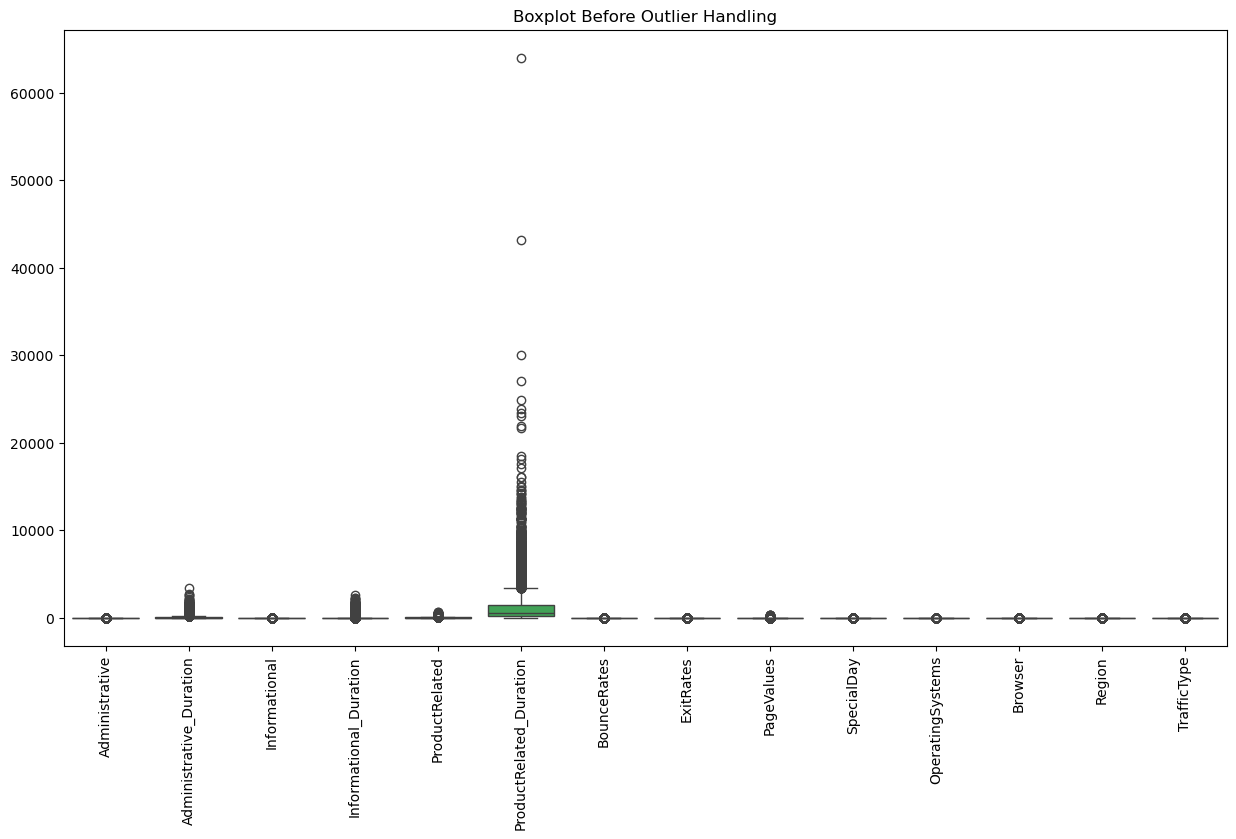

In [49]:
# Select only numerical columns
numerical_cols = df2.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot Before Outlier Handling")
plt.show()